## Manually Set Confounding Variables

In [49]:
# confounders = ['baseline', 'Apr Temp AVG / F', 'Total households!!Average household size', 'Jun Temp AVG / F', 'HospCt',\
#                'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)', \
#                'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)', \
#               'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten', 'Med_HH_Income_Percent_of_State_Total_2018',\
#                'Density per square mile of land area - Population', 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool']
confounders = ['baseline']

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from collections import defaultdict
import sys; sys.path.append('../')
from src.data_analysis.tools import ac_pca

## Get Preprocessed data

In [51]:
combined_data = pd.read_csv('../data/intermediates/pre_acpca1.csv')
combined_data.set_index('FIPS', inplace=True)
print(combined_data.shape)
combined_data.head()

(397, 21)


,baseline,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Mar Temp AVG / F,Apr Temp AVG / F,May Temp AVG / F,...,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,HospCt,Deaths,normalized_deaths
FIPS,,,,,,,,,,,,,,,,,,,,,
1055.0,0.449395,0.002718,0.4,0.402985,0.122490,0.135802,0.222485,0.697723,0.736148,0.781775,...,0.203494,0.325792,0.294336,0.358494,0.567540,0.342774,0.075155,0.261462,0.000986,0.028791
1073.0,0.483877,0.008438,0.0,0.247761,0.417671,0.111111,0.342604,0.718427,0.751979,0.803357,...,0.138366,0.276018,0.520694,0.386817,0.576102,0.400644,0.172229,0.169115,0.005521,0.013511
1081.0,0.307942,0.003231,0.4,0.223881,0.451807,0.104938,0.270414,0.757764,0.757256,0.805755,...,0.056305,0.343891,0.586319,0.144048,0.571650,0.427235,0.609583,0.050141,0.003943,0.046459
1095.0,0.516342,0.002275,0.6,0.510448,0.152610,0.092593,0.238462,0.672878,0.712401,0.772182,...,0.162744,0.334842,0.241579,0.364819,0.680389,0.623360,0.086210,0.281908,0.000591,0.024185
1097.0,0.456792,0.004744,0.2,0.352239,0.226908,0.172840,0.207101,0.846791,0.823219,0.868106,...,0.145504,0.303167,0.505194,0.328976,0.607318,0.491922,0.119985,0.106354,0.006901,0.028506


In [52]:
ind_vars = list(combined_data.drop(columns=confounders).columns)
ind_vars

['Density per square mile of land area - Population',
 'Rural-urban_Continuum Code_2013',
 'Percent of adults with less than a high school diploma 2014-18',
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'Unemployment_rate_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Mar Temp AVG / F',
 'Apr Temp AVG / F',
 'May Temp AVG / F',
 'Jun Temp AVG / F',
 'Total_age65plus',
 'Total households!!Average household size',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school',
 'HospCt',
 'Deaths',
 'normalized_deaths']

## Set data and confounders

In [53]:
X = combined_data.drop(columns=['Deaths', 'normalized_deaths'], inplace=False)
X = X.drop(columns=confounders, inplace=False).to_numpy() # 'Density per square mile of land area - Population',
print(X.shape)
X_rows, X_cols = X.shape
column_names = ['PC' + str(i) for i in range(1, X_cols + 1)]

Y = combined_data.filter(confounders).to_numpy()
if len(Y.shape) < 2: 
    Y = Y.reshape(len(Y), 1)
acpca_data, PCs, eigs = ac_pca(X, Y)

(397, 18)


In [54]:
eigs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1135.575728,59.472532,34.154171,16.068839,9.402926,6.349207,5.705604,4.342893,3.039029,2.706327,2.37048,2.121685,0.211498,1.445489,1.124195,0.571083,0.860949,0.780157


In [55]:
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.096654,0.010343,-0.045079,-0.038747,0.079268,-0.029600,-0.049279,-0.189644,0.050553,-0.052895,-0.057975,0.135176,-0.073632,0.190678,-0.531048,-0.530366,-0.519346,-0.199189
1,0.366740,0.062957,0.403009,0.046254,-0.736595,-0.257342,0.117364,-0.058022,-0.117866,0.069033,0.179855,0.092108,0.002513,0.055161,-0.019395,0.048334,-0.067084,-0.035952
2,0.132026,0.049771,0.343558,-0.386374,0.308442,-0.101442,0.042959,-0.465444,0.199292,-0.018742,0.117929,-0.026622,0.044441,0.435047,-0.069530,0.083476,0.353267,0.079617
3,0.286331,0.000543,-0.687398,-0.215578,-0.195710,-0.152781,0.148297,-0.415568,-0.039576,0.054281,-0.301715,0.106789,-0.009996,-0.020346,0.168540,0.047140,0.066946,0.010899
4,0.122293,0.021361,0.156556,-0.112905,0.108704,-0.168234,-0.003263,-0.089227,-0.080060,0.144876,-0.232190,-0.145113,0.016777,-0.599882,-0.497408,0.113967,0.052508,0.416618


In [56]:
acpca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.144171,-0.559686,0.441404,0.143266,-0.032515,0.041538,0.042573,-0.073942,0.069913,-0.040088,0.062662,0.032184,0.012797,0.009689,0.023015,0.022909,-0.025152,-0.010892
1,0.030475,-0.642148,-0.081302,-0.019614,0.084462,0.094875,-0.087086,0.004430,0.034159,-0.042483,0.001476,0.002625,0.001223,-0.010255,0.007296,0.002108,0.008720,0.030479
2,0.425703,-0.591986,-0.042316,-0.181997,-0.112938,-0.129721,0.108459,0.319840,0.004035,-0.031628,0.171087,-0.030437,-0.016038,0.040374,0.002410,-0.024456,-0.023765,0.020886
3,0.069201,-0.518664,0.565707,0.001140,-0.217627,-0.067994,0.188339,-0.066355,0.056351,0.041223,-0.026663,0.070934,0.006677,0.165884,0.027946,0.004377,0.005205,-0.007981
4,0.082150,-0.794110,0.238790,-0.048688,0.070041,-0.036433,-0.060333,0.048287,-0.073462,-0.038793,0.007321,0.009211,-0.034055,0.023521,-0.016330,0.013288,0.013586,0.005210


18


<BarContainer object of 18 artists>

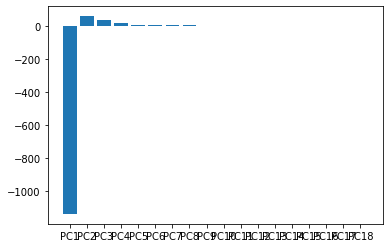

In [57]:
acpca_data = acpca_data.to_numpy()
PCs = PCs.to_numpy()
eigs = eigs.to_numpy()
_, total_pcs = eigs.shape
print(total_pcs )
# print(eigens.loc[0,eigens.columns.values[0:]])
# labels = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(column_names, list(eigs.reshape(total_pcs))) 

## Regression on individual components

PC:  1
deaths corr score 0.021851143413748945
mobility corr score 0.3161098865437897
PC:  2
deaths corr score 0.0297919498911281
mobility corr score 4.252290691342253e-06
PC:  3
deaths corr score 0.0024263573610560085
mobility corr score 2.0651405907567977e-07
PC:  4
deaths corr score 2.9732528496695387e-05
mobility corr score 1.283636088178497e-05
PC:  5
deaths corr score 0.0005388251059159632
mobility corr score 2.362709572212296e-06
PC:  6
deaths corr score 0.008176422776445147
mobility corr score 1.2392309994835315e-06
PC:  7
deaths corr score 0.01336093883787648
mobility corr score 8.470927672643569e-07
PC:  8
deaths corr score 0.025981783668562852
mobility corr score 3.6327702340743784e-06
PC:  9
deaths corr score 0.005975560158015592
mobility corr score 1.267149190797845e-06
PC:  10
deaths corr score 7.429231274169723e-05
mobility corr score 4.437501588405723e-09
PC:  11
deaths corr score 0.01202630895722645
mobility corr score 1.6473562929331107e-06
PC:  12
deaths corr score 0.

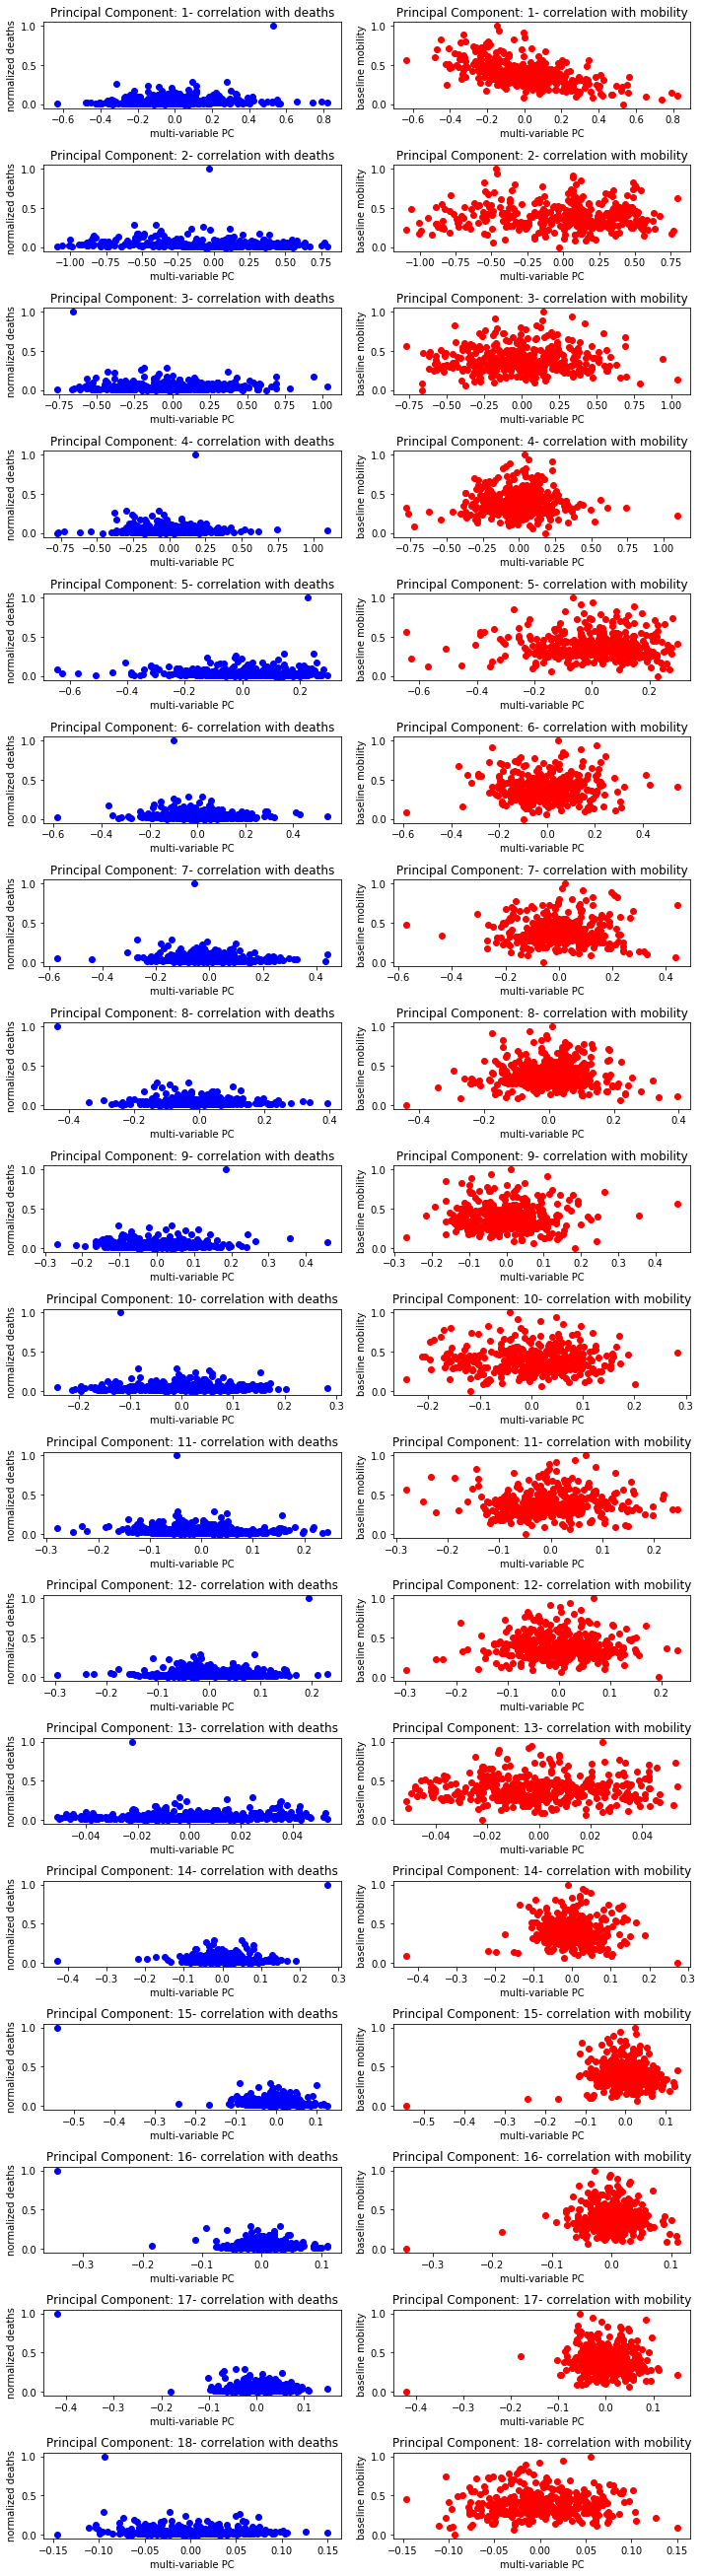

In [58]:
scores = {}
plt.figure(figsize=(10,40))
target_pcs = 0

for pc in range(total_pcs): 
    print('PC: ', pc+1)
    X = acpca_data[:,pc]
    (r,) = X.shape
#     print(X.shape)
    X = X.reshape(r,1)
#     print(X.shape)
    Y = combined_data['normalized_deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    
    print("deaths corr score", score)
    plt.subplot(20,2,2*pc+1)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('normalized deaths')
    plt.title('Principal Component: ' + str(pc+1) + '- correlation with deaths')
    
    m = combined_data['baseline']
   
    reg_mob = lm.LinearRegression().fit(X,m)
    m_score = reg_mob.score(X,m)
    print('mobility corr score', m_score)
    plt.subplot(20,2,2*pc+2)
    plt.plot(X, m, 'ro')
    plt.xlabel('multi-variable PC')
    plt.ylabel('baseline mobility ')
    plt.title('Principal Component: ' + str(pc+1) + '- correlation with mobility')
    eig = eigens.loc[0, 'PC' + str(pc+1)]
    if eig > 0: 
        target_pcs += 1
        scores[pc] = score

## Sort PCs by regression scores

In [59]:
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: -item[1])}
for pc, score in scores.items():
    print(pc+1, score)

15 0.1820726152172506
16 0.1264392811214038
17 0.10994556091439966
2 0.0297919498911281
14 0.02633736281758292
8 0.025981783668562852
18 0.01782975257255437
7 0.01336093883787648
11 0.01202630895722645
13 0.009337874621139552
6 0.008176422776445147
9 0.005975560158015592
12 0.0051752187618279155
3 0.0024263573610560085
5 0.0005388251059159632
10 7.429231274169723e-05
4 2.9732528496695387e-05


## Regression on multiple compnents

PCs: [15]
0.1820726152172506
[-0.53733372] 


PCs: [15 16]
0.3085151648439515
[-0.53733854 -0.62825617] 


PCs: [15 16 17]
0.41845934101865623
[-0.53734245 -0.62824614 -0.47713139] 


PCs: [15 16 17  2]
0.4482697275847999
[-0.53732697 -0.62828584 -0.4771595  -0.02988013] 


PCs: [15 16 17  2 14]
0.4745953249837437
[-0.53732143 -0.62830004 -0.47716956 -0.02987093  0.1801766 ] 


PCs: [15 16 17  2 14  8]
0.500621338301861
[-0.53733479 -0.62826579 -0.4771453  -0.02989313  0.18023085 -0.10332338] 


PCs: [15 16 17  2 14  8 18]
0.5184500887037444
[-0.53733256 -0.62827151 -0.47714935 -0.02988942  0.1802218  -0.10333605
 -0.20183978] 


PCs: [15 16 17  2 14  8 18  7]
0.5318153170525877
[-0.53733718 -0.62825967 -0.47714097 -0.0298971   0.18024055 -0.1033098
 -0.20185227 -0.06461659] 


PCs: [15 16 17  2 14  8 18  7 11]
0.5438412532449708
[-0.53734329 -0.628244   -0.47712987 -0.02990725  0.18026536 -0.10327507
 -0.2018688  -0.06460197 -0.09508519] 


PCs: [15 16 17  2 14  8 18  7 11 13]
0.55317

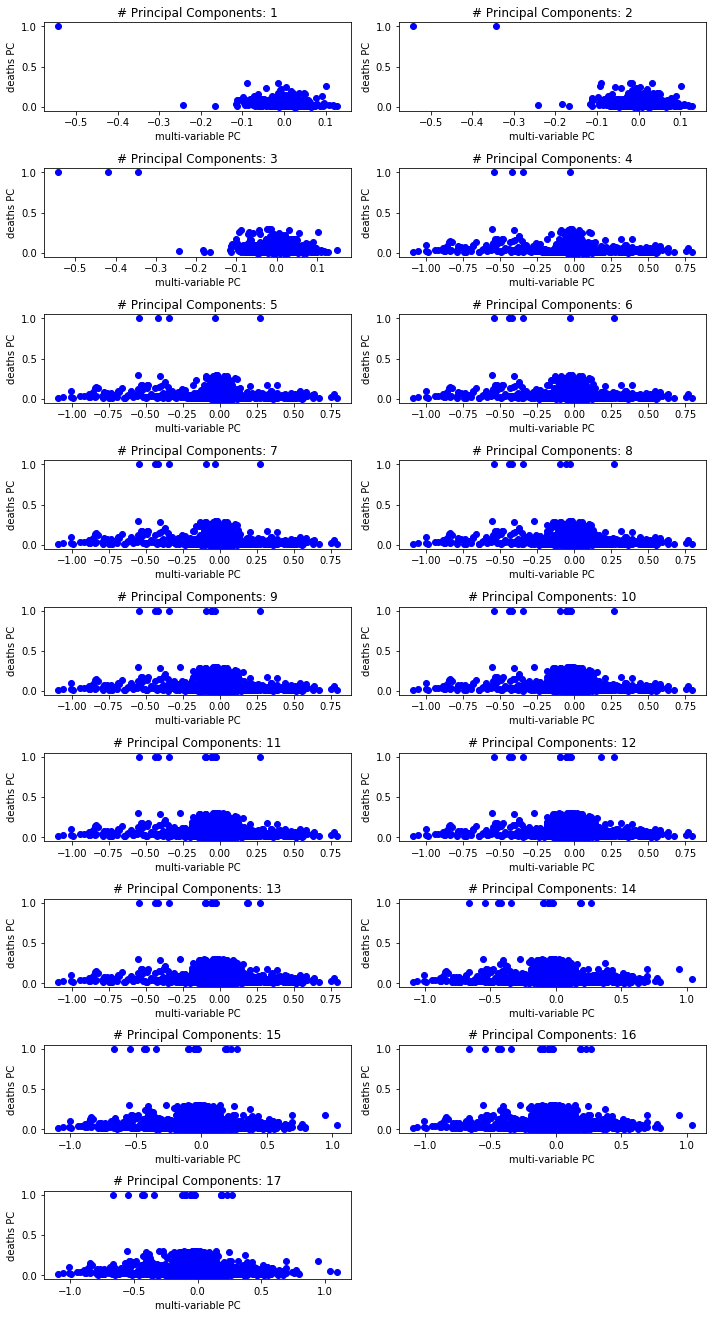

In [60]:
# Get list of PCs that are most correlated with # deaths
# Add PCs to LR model one by one in order of highest to lowest regression scores
Y = combined_data['normalized_deaths']
plt.figure(figsize=(10,20))
# num_pcs = 5

for num_pcs in range(1, target_pcs+1): 
    inds_pcs = list(scores.keys())[:num_pcs] # indices of top num_pcs most correlated PCs
    print('PCs:', np.array(inds_pcs)+1)
    X = acpca_data[:,inds_pcs]
#     print(X.shape)
#     Y = combined_data['Deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    print(score)
    print(reg.coef_, '\n\n')
    plt.subplot(10,2,num_pcs)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('deaths PC')
    plt.title('# Principal Components: ' + str(num_pcs))
    

## Assign coefficients of LR model to PCs

In [61]:
inds_pcs = list(scores.keys()) # indices of top num_pcs most correlated PCs
print('PCs:', np.array(inds_pcs)+1)
X = acpca_data[:,inds_pcs]
#     print(X.shape)
# Y = combined_data['Deaths']
Y = combined_data['normalized_deaths']
#     print(Y.shape)
reg = lm.LinearRegression().fit(X,Y)
final_score = reg.score(X,Y)
print(final_score)
print(reg.coef_, '\n\n')
coeffs = {}
for i in range(len(inds_pcs)): 
    coeffs[inds_pcs[i]] = reg.coef_[i]
    print(inds_pcs[i]+1, reg.coef_[i])

PCs: [15 16 17  2 14  8 18  7 11 13  6  9 12  3  5 10  4]
0.5755681328104194
[-0.53734926 -0.62822869 -0.47711903 -0.02991718  0.18028961 -0.10324112
 -0.20188495 -0.06458767 -0.09505425  0.28056786 -0.04788642  0.05926323
  0.06590553 -0.01124806  0.01007121 -0.00699873 -0.00174979] 


15 -0.5373492597602224
16 -0.628228692379417
17 -0.477119029236603
2 -0.029917175528779517
14 0.18028961330610987
8 -0.1032411247606565
18 -0.20188495323793293
7 -0.06458767249878239
11 -0.09505425449502368
13 0.2805678557127833
6 -0.04788641570145332
9 0.05926322890224115
12 0.0659055345313141
3 -0.011248062575843409
5 0.010071205256830402
10 -0.006998725970654924
4 -0.0017497940588063147


## Print PCs in order of regression scores
#### print values in PCs in order of highest to lowest absolute value of loadings 
#### For each variable, calculate a sum of the product of the weights in each PC multiplied by the coefficient corresponding to the PC 

In [63]:
weights = {}
r,c = PCs.shape
for j in range(target_pcs): 
    pc = list(scores.keys())[j]
    eig = eigens.loc[0, 'PC' + str(pc)]
    if eig < 0: 
        continue
    print('Principal Component', str(pc))
    print('eigenvalue: ', eig)
    PC_dict = {}
    # PC9 = [-0.190896056547888, 0.468236937317933,-0.228567222005448,0.408002822993487,0.0535105125245226,0.407238079363182,0.181820228133276,0.366604933989350,0.435246581102968]
    for i in range(r): 
    #     print('{0:<80} \t {1:>0.3f}'.format(combined_data.columns.values[i+2], PC9[i]))
        loading = PCs[i,pc] # weight of variable in component
        variable = ind_vars[i] # variable name in column headers 
        PC_dict[variable] = loading
        coef = coeffs[pc-1] # coefficient corresponding to PC
        if variable not in weights:
            weights[variable] = 0
        weights[variable] += coef * loading
    PC_dict = {k: v for k, v in sorted(PC_dict.items(), key=lambda item: -abs(item[1]))}
    for k, v in PC_dict.items():
        print('{0:<100} \t {1:>0.3f}'.format(k, v))
    print('\n\n\n')
print(weights)

Principal Component 14
eigenvalue:  1.4454893877871593
Density per square mile of land area - Population                                                    	 -0.531
Unemployment_rate_2018                                                                               	 -0.497
Med_HH_Income_Percent_of_State_Total_2018                                                            	 -0.386
Total_age65plus                                                                                      	 0.280
Total households!!Average household size                                                             	 0.262
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)    	 0.232
May Temp AVG / F                                                                                     	 0.212
Percent of adults with a bachelor's degree or higher 2014-18                                         	 0.169
Jun Temp AVG / F                                                      

In [70]:
print('score:', final_score)
max_weight = np.max(np.abs(np.array(list(weights.values()))))
max_var = None
for var, weight in weights.items():
#     print('{0:<100} & {1:>0.4f} \\\\ \hline'.format(var.replace('_', '\\_'), weight))
    if abs(weight) == max_weight: 
        max_var = var
        print('*** {0:<100} {1:>0.4f}'.format(var, weight))
    else:
        print('{0:<100} {1:>0.4f}'.format(var, weight))
print('\n\nmax var: ', max_var)

score: 0.5755681328104194
*** Density per square mile of land area - Population                                                    0.6544
Rural-urban_Continuum Code_2013                                                                      0.0360
Percent of adults with less than a high school diploma 2014-18                                       -0.1918
Percent of adults with a bachelor's degree or higher 2014-18                                         -0.0078
Unemployment_rate_2018                                                                               -0.5170
Med_HH_Income_Percent_of_State_Total_2018                                                            -0.2843
Mar Temp AVG / F                                                                                     -0.0885
Apr Temp AVG / F                                                                                     0.1177
May Temp AVG / F                                                                                     